In [1]:
import os
import pickle
import sys

sys.path.append(sys.path[0] + "/..")  # Adds higher directory to python modules path.

import numpy as np
import scipy
from Functions import renormalize, scomplex, plotting, support
import matplotlib.pyplot as plt
from scipy.stats import entropy as sp_entropy
import networkx as nx
import sklearn
from sklearn import cluster
import seaborn as sns
import powerlaw as pwl
plt.rcParams["text.usetex"] = True

import matplotlib.colors as mcolors
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, linkage

from matplotlib.colors import LinearSegmentedColormap

colors = list(mcolors.CSS4_COLORS)
colors = colors + colors
cmap = LinearSegmentedColormap.from_list("my_sas",colors)


In [25]:
L = 8
l = 2
l2 = 3
n = 0
edges = []
for i in range(L-1):
    edges.append((i,i+1))
    n+=1
edges.append((0,L-1))
n+=1
for i in range(L):
    edges.append((i,n))
    sas = n
    for j in range(l-1):
        edges.append((sas+j,sas+j+1))
        n+=1
    edges.append((np.mod(i+1,L),n))
    n += 1
    i += 1


N = n
for i in range(L,N):
    edges.append((i,n))
    sas = n
    for j in range(l2-1):
        edges.append((sas+j,sas+j+1))
        n+=1
    edges.append((i+1,n))
    n += 1
    i += 1

e = edges.pop()
edges.append((L,e[1]))

# for i in range(L):
#     edges.append([n,i])
#     i += 1



In [15]:
L = 20
l = 5
n = 0
edges = []
for i in range(L-1):
    edges.append((i,i+1))
    n+=1
edges.append((0,L-1))
n+=1
edges.append((0,L/2))
for i in range(L):
    if np.random.rand() <= 0.5:
        edges.append((i,n))
        n+=1

edges.append((n-1,0))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


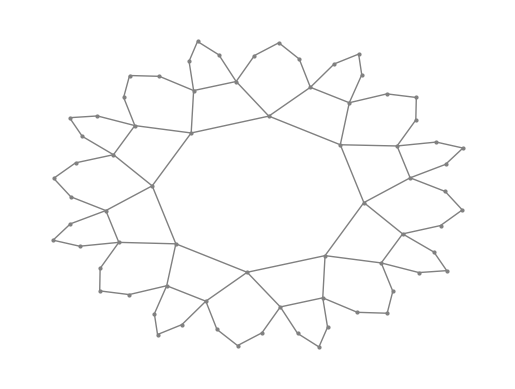

In [26]:
#sc  = generate_fractal_cycle([20,40,60,5],0.03,20)
#sc = scomplex.generate_tlattice(12,12,0)
#sc = scomplex.NGF(2,300,1,1)
#sc = scomplex.generate_bridged_communities(100,100,0.02,0.02,20)

#G = nx.dorogovtsev_goltsev_mendes_graph(5)

# Merge Geometric Graphs
# H1 = nx.random_geometric_graph(50, radius = 0.2, dim=2, pos=None, p=3, seed=None)
# H2 = nx.random_geometric_graph(50, radius = 0.2, dim=2, pos=None, p=3, seed=None)
# H3 = nx.random_geometric_graph(50, radius = 0.2, dim=2, pos=None, p=3, seed=None)
# G = nx.union(H1, H2,rename=("H1", "H2"))
# G = nx.union(G, H3,rename=("", "H3"))
# G = nx.contracted_nodes(G,"H10","H20")
# G = nx.contracted_nodes(G,"H240","H340")
# G = nx.contracted_nodes(G,"H320","H120")
# G = nx.convert_node_labels_to_integers(G)
# Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
# G = G.subgraph(Gcc[0])

#G = nx.random_tree(200, seed=10)

# edges = []
# L = 10
# l = 4
# l2 = 4
# n = 0
# for i in range(L-1):
#     edges.append((i,i+1))
#     n+=1
# edges.append((0,L-1))
# n+=1
# for i in range(L):
#     edges.append((i,n))
#     sas = n
#     if i == 0:
#         lal = l - 1
#     else:
#         lal = l - 1
#     for j in range(lal):
#         edges.append((sas+j,sas+j+1))
#         n+=1
#     edges.append((i,n))
#     n += 1


# N = n
# for i in range(L,N):
#     edges.append((i,n))
#     sas = n
#     for j in range(l2-1):
#         edges.append((sas+j,sas+j+1))
#         n+=1
#     edges.append((i,n))
#     n += 1


#G = nx.stochastic_block_model([40,40],[[0.3,0.02],[0.02,0.3]])
G = nx.from_edgelist(edges)


# f = open("CaenorhabditisElegans_lcb_hq.txt","r")
# i = 0
# edges = []
# for line in f:
#     if i != 0:
#         words = line.split()
#         edges.append((words[0],words[1]))
#     else:
#         i += 1
# f.close()
# G = nx.from_edgelist(edges)
# G = nx.convert_node_labels_to_integers(G)
# G.remove_edges_from(nx.selfloop_edges(G))
# Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
# G = G.subgraph(Gcc[0])


sc = scomplex.convert_graph_to_sc(G)

# Break an edge
#sc["edges"] = sc["edges"][1:,:]
#sc["n1"] = sc["n1"] - 1

#sc["faces"] = np.zeros((0,3))
#sc["n2"] = 0

B1, B2, __, __, edge_dict, face_dict, tet_dict = scomplex.boundary_matrices_3(sc)

if np.min(B2.shape) > 0:
    assert(np.max(np.abs(B1@B2)) == 0)
assert(np.max(np.abs(np.sum(B1,0))) == 0)

L0 = (B1@B1.T).todense()
L1 = (B1.T@B1 + B2@B2.T).todense()
#L1 = (B1.T@B1).todense()
L2 = (B2.T@B2).todense()

L1B = L1 - np.diag(np.diag(L1)) + np.diag(np.array(np.sum(np.abs(L1 - np.diag(np.diag(L1))),0))[0])

f,ax = plt.subplots(1,1)
plotting.plot_complex(sc,ax = ax,color=[0.5,0.5,0.5],layout = "spring", node_size=4)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/marconurisso/Desktop/Work/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:305: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))


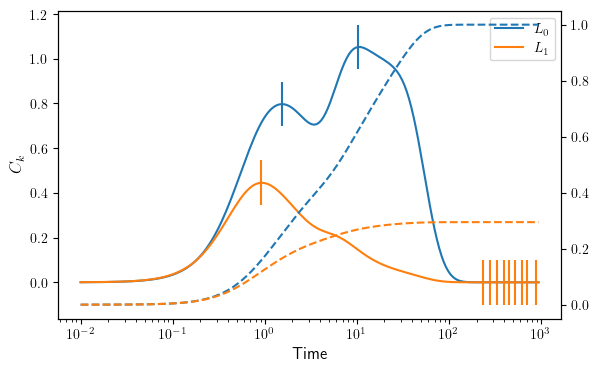

In [27]:
D0,D1,D2,tau_space, fpeaks,fpeaks1,fpeaks2 = renormalize.plot_heats(1,sc, -2,3)


In [28]:
L1B = L1 - np.diag(np.diag(L1)) + np.diag(np.array(np.sum(np.abs(L1 - np.diag(np.diag(L1))),0))[0])
F = L1 - L1B
L1diff = np.diag(np.diag(L1B)) - np.abs(L1B-np.diag(np.diag(L1B)))
A = L1B - L1diff
L1cured = L1diff + F
D1c = scipy.linalg.eigh(L1cured)[0]


In [31]:
F

matrix([[-4,  0,  0, ...,  0,  0,  0],
        [ 0, -4,  0, ...,  0,  0,  0],
        [ 0,  0, -4, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/marconurisso/Desktop/Work/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:305: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))


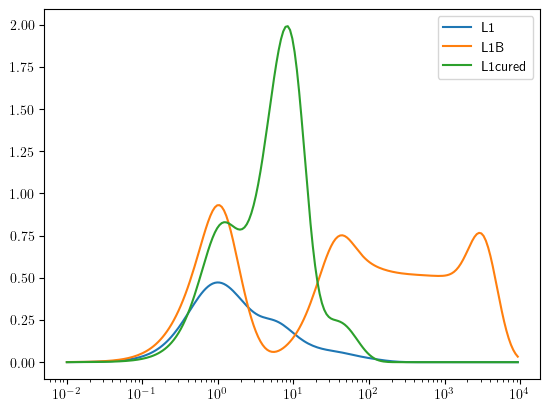

In [21]:
D1B = scipy.linalg.eigh(L1B)[0]
D1 = scipy.linalg.eigh(L1)[0]
F = L1 - L1B
L1cured = np.diag(np.diag(L1)) + np.abs(L1 - np.diag(np.diag(L1)))
D1c = scipy.linalg.eigh(L1cured)[0]

specific_heat1,tau_space, S1 = renormalize.compute_heat(D1,-2,4,200)
plt.semilogx(tau_space, specific_heat1)
specific_heat1B,tau_space, S1B = renormalize.compute_heat(D1B,-2,4,200)
plt.semilogx(tau_space,specific_heat1B)
specific_heat1c,tau_space, S1c = renormalize.compute_heat(D1c,-2,4,200)
plt.semilogx(tau_space,specific_heat1c)
plt.legend(["L1","L1B","L1cured"])



### COMPUTE EMBEDDING

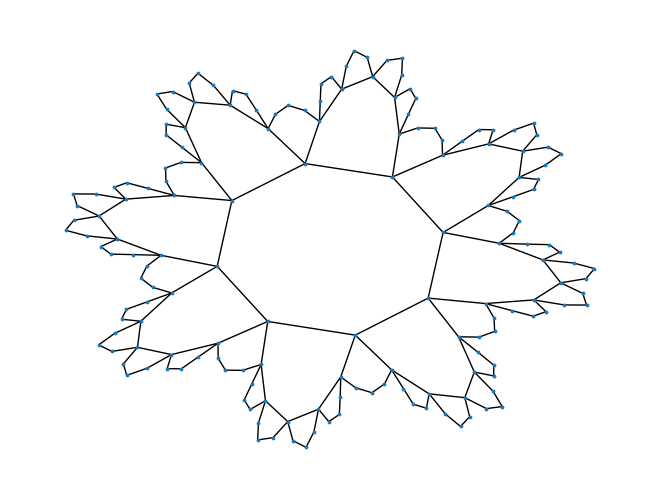

In [22]:
G = nx.Graph()
G.add_nodes_from([i for i in range(sc["n0"])])
for i in range(sc["n1"]):
    G.add_edge(sc["edges"][i,0],sc["edges"][i,1])
#G = nx.from_edgelist([sc["edges"][i,:] for i in range(sc["n1"])])

pos = nx.spring_layout(G,iterations = 1000)
#pos = nx.spectral_layout(G)
nx.draw(G,pos = pos, node_size = 3)

# NODES

In [139]:
D0,U0 = np.linalg.eigh(L0)

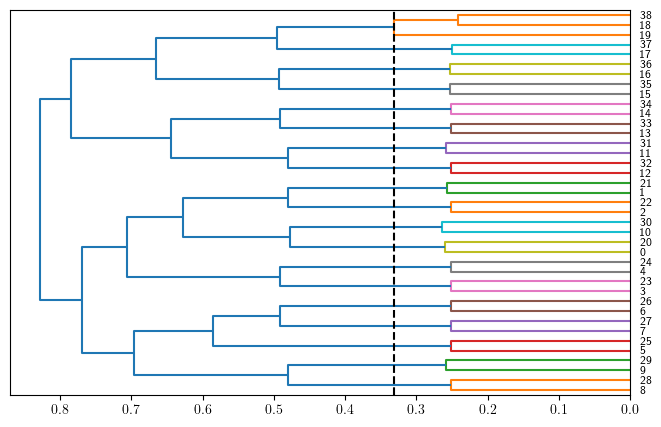

In [140]:
#tau = tau_space[fpeaks[0]]
#tau = 1/np.max(D0)
tau = 2
rho0 = scipy.linalg.expm(-tau*L0)

emb = (U0@np.diag(np.exp(-tau*D0)))
distmatrix = np.zeros_like(rho0)
for i in range(sc["n0"]):
    for j in range(i+1,sc["n0"]):
        #distmatrix[i,j] = np.abs(1/rho0[i,j])
        #distmatrix[i,j] = np.linalg.norm(rho0[:,i]-rho0[:,j])
        distmatrix[i,j] = np.linalg.norm(emb[i,:] - emb[j,:],2)
distmatrix = (distmatrix + distmatrix.T)

condensed_dist = squareform(distmatrix)
condensed_dist = condensed_dist/np.max(condensed_dist)
Z = linkage(condensed_dist, method = "average")

psi, thresholds = renormalize.compute_psi_nlog(Z,10)

f,ax = plt.subplots(figsize = (8,5))

#maxpsi = scipy.signal.find_peaks(psi, 0.3*np.max(psi))[0]
maxpsi = [np.argmax(psi)]

#plt.set_cmap(cmap)
den = dendrogram(Z, orientation="left", ax = ax, color_threshold = thresholds[maxpsi[-1]] + np.finfo(np.float64).eps);

#ax.set_xscale("symlog",linthresh = np.min(Z[:,2]))

for id in maxpsi:
    ax.vlines(x = thresholds[id] + np.finfo(np.float64).eps, ymin = ax.get_ylim()[0], ymax = ax.get_ylim()[1], linestyle = "dashed", color = "black")



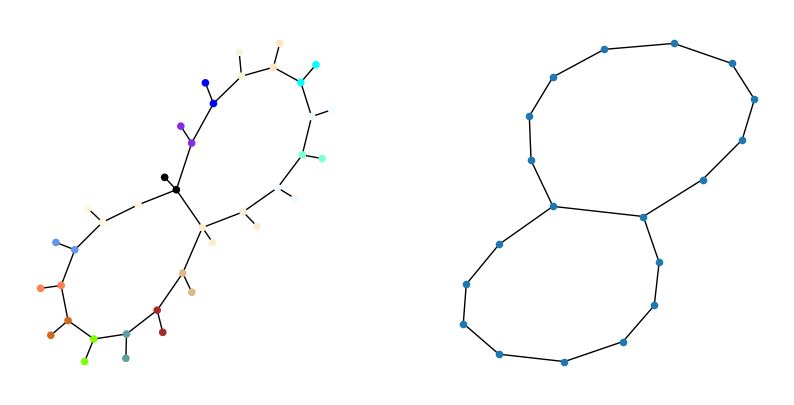

In [141]:
thr =  thresholds[maxpsi[-1]] + np.finfo(np.float64).eps
ns = 20
clusters = scipy.cluster.hierarchy.fcluster(Z,thr,criterion='distance') - 1

colors_nodes = [(colors)[i] for i in clusters]

#pos = nx.spring_layout(G,iterations = 5000)
f,axs = plt.subplots(1,2,figsize = (10,5))
nx.draw(G,node_color=colors_nodes,pos = pos, node_size = ns, ax = axs[0])


mapnodes,__ = renormalize.coarse_grain(sc,0,clusters,np.max(clusters)+1)
new_sc = renormalize.induce_simplices(sc, mapnodes)

Gnew = nx.Graph()
Gnew.add_nodes_from([i for i in range(new_sc["n0"])])
for i in range(new_sc["n1"]):
    Gnew.add_edge(new_sc["edges"][i,0],new_sc["edges"][i,1])
posnew = nx.spring_layout(Gnew,iterations =2000)
#posnew = nx.spectral_layout(Gnew)
nx.draw(Gnew, node_size = ns, pos = posnew, ax = axs[1])



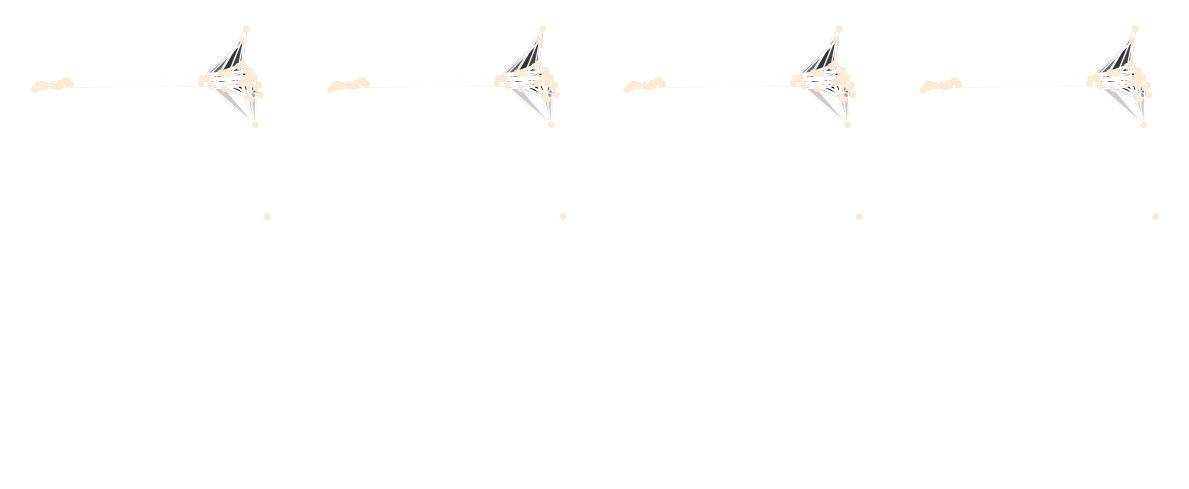

In [207]:
fig,axs = plt.subplots(2,4,figsize = (12,5))

thrs = [15,20,29,40]
colz = "white"

for k in range(4):
    thr = thrs[k]
    clusters = scipy.cluster.hierarchy.fcluster(Z,thr,criterion='distance')
    colors_nodes = [colors[i] for i in clusters]

    for i in range(sc["n2"]):
                f = sc["faces"][i, :]
                x = [pos[f[0]][0], pos[f[1]][0], pos[f[2]][0]]
                y = [pos[f[0]][1], pos[f[1]][1], pos[f[2]][1]]
                axs[0,k].fill(x, y, color='k', alpha=0.2)
    nx.draw(G,node_color=colors_nodes,pos = pos, node_size = 15,ax = axs[0,k], edge_color = colz)


    mapnodes,__ = renormalize.coarse_grain(sc,0,clusters,np.max(clusters)+1)
    new_sc = renormalize.induce_simplices(sc, mapnodes)

    Gnew = nx.Graph()
    Gnew.add_nodes_from([i for i in range(new_sc["n0"])])
    for i in range(new_sc["n1"]):
        Gnew.add_edge(new_sc["edges"][i,0],new_sc["edges"][i,1])
    #posnew = nx.spring_layout(Gnew,iterations = 10000)
    posnew = nx.spectral_layout(Gnew)
    nx.draw(Gnew, node_size = 20, node_color = colz, edge_color = colz, pos = posnew, ax = axs[1,k])


fig.tight_layout()
plt.savefig('clusters4_0.png', transparent=True)



# EDGES

In [33]:
D1,U1 = np.linalg.eigh(L1cured)

In [26]:
# Choose the time resolution

#tau = tau_space[fpeaks1[0]]
#tau = 1/np.max(D1)
tau = 20

#emb = np.abs(U1@np.diag(np.exp(-tau*D1)))
rho1 = np.abs(U1@np.exp(-tau*D1)@U1.T)

distmatrix = np.zeros((sc["n1"],sc["n1"]))
for i in range(sc["n1"]):
    for j in range(i+1,sc["n1"]):
        if rho1[i,j] == 0:
            distmatrix[i,j] = 10**2
        else:
            distmatrix[i,j] = np.abs(1/rho1[i,j])
        #distmatrix[i,j] = np.linalg.norm(rho1[:,i]-rho1[:,j])
        #distmatrix[i,j] = np.linalg.norm(emb[i,:]-emb[j,:],2)

distmatrix = (distmatrix + distmatrix.T)


condensed_dist = squareform(distmatrix)
condensed_dist = condensed_dist/np.max(condensed_dist)

Z = linkage(condensed_dist, method = "average")

psi, thresholds = renormalize.compute_psi_nlog(Z,15)

f,ax = plt.subplots(figsize = (8,5))

#maxpsi = scipy.signal.find_peaks(psi, 0.3*np.max(psi))[0]
maxpsi = [np.argmax(psi)]

if len(maxpsi) > 0:
    den = dendrogram(Z, orientation="left", ax = ax, color_threshold = thresholds[maxpsi[-1]] +  np.finfo(np.float64).eps);
else:
    den = dendrogram(Z, orientation="left", ax = ax);

#ax.set_xscale("symlog",linthresh = np.min(Z[:,2]))

for id in maxpsi:
    ax.vlines(x = thresholds[id], ymin = ax.get_ylim()[0], ymax = ax.get_ylim()[1], linestyle = "dashed", color = "black")


IndexError: index 1 is out of bounds for axis 0 with size 1

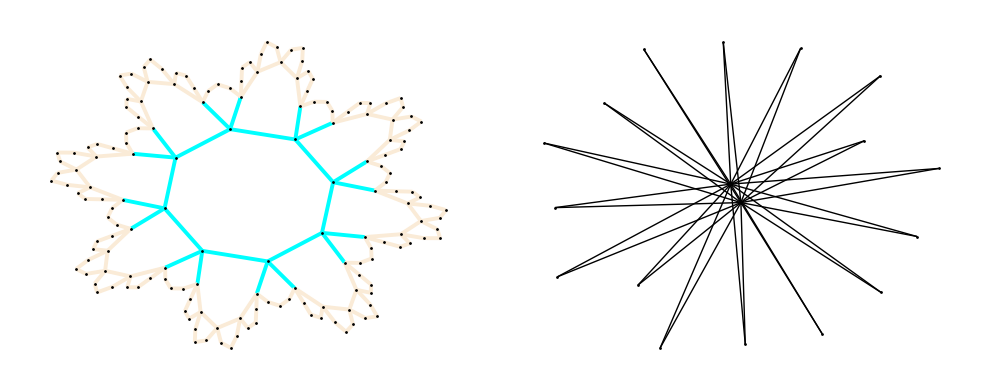

In [25]:
fig,axs = plt.subplots(1,2,figsize = (10,4))

thr = thresholds[maxpsi[-1]] - np.finfo(np.float64).eps
#thr = 10**-(4)
#thr = 0.011
ns = 1
clusters = scipy.cluster.hierarchy.fcluster(Z,thr,criterion='distance')

colz = "black"

colors_edges = [(colors + colors)[i] for i in clusters]

nx.draw(G,edge_color=colors_edges,pos = pos, node_size = ns,width = 2.8,node_color = colz, ax = axs[0])

mapnodes,__ = renormalize.coarse_grain(sc,1,clusters,np.max(clusters)+1)
new_sc = renormalize.induce_simplices(sc, mapnodes)

Gnew = nx.Graph()
Gnew.add_nodes_from([i for i in range(new_sc["n0"])])
for i in range(new_sc["n1"]):
    Gnew.add_edge(new_sc["edges"][i,0],new_sc["edges"][i,1])
posnew = nx.spring_layout(Gnew,iterations =2000)
#posnew = nx.spectral_layout(Gnew)


nx.draw(Gnew, node_size = ns, node_color = colz, edge_color = colz, width = 1, pos = posnew, ax = axs[1])
fig.tight_layout()
#plt.savefig('clusters_renorm.png', transparent=True)




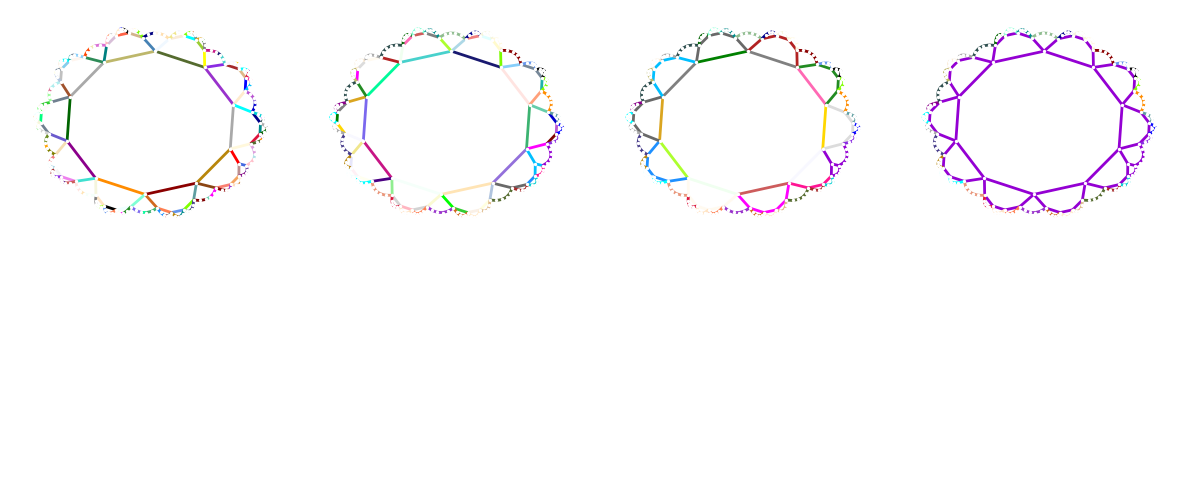

In [108]:
fig,axs = plt.subplots(2,4,figsize = (12,5))

thrs = [4.5,5.1,5.8,6.2]
colz = "white"

for k in range(4):
    thr = thrs[k]
    clusters = scipy.cluster.hierarchy.fcluster(Z,thr,criterion='distance')
    colors_edges = [colors[i] for i in clusters]

    for i in range(sc["n2"]):
                f = sc["faces"][i, :]
                x = [pos[f[0]][0], pos[f[1]][0], pos[f[2]][0]]
                y = [pos[f[0]][1], pos[f[1]][1], pos[f[2]][1]]
                axs[0,k].fill(x, y, color='k', alpha=0.2)
    nx.draw(G,edge_color=colors_edges,pos = pos, node_size = 2, width = 2, ax = axs[0,k], node_color = colz)


    mapnodes,__ = renormalize.coarse_grain(sc,1,clusters,np.max(clusters)+1)
    new_sc = renormalize.induce_simplices(sc, mapnodes)

    Gnew = nx.Graph()
    Gnew.add_nodes_from([i for i in range(new_sc["n0"])])
    for i in range(new_sc["n1"]):
        Gnew.add_edge(new_sc["edges"][i,0],new_sc["edges"][i,1])
    #posnew = nx.spring_layout(Gnew,iterations = 20000)
    posnew = nx.spectral_layout(Gnew)

    #if k == 0:
    #    posnew = pos
    nx.draw(Gnew, node_size = 4, node_color = colz,  edge_color = colz, pos = posnew, ax = axs[1,k])


fig.tight_layout()
plt.savefig('clusters4_1.png', transparent=True)



/Users/marconurisso/Desktop/Work/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:305: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


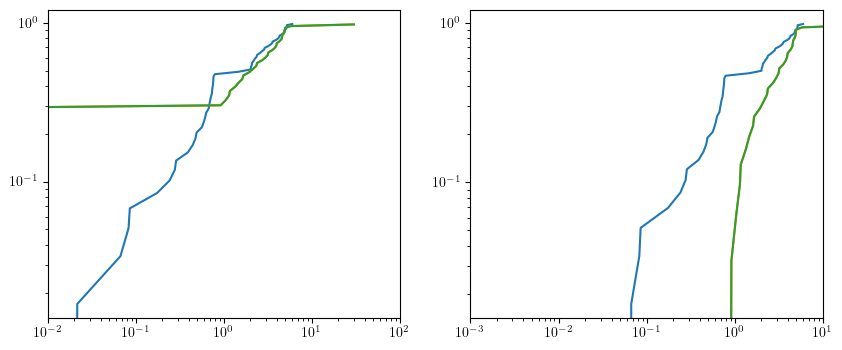

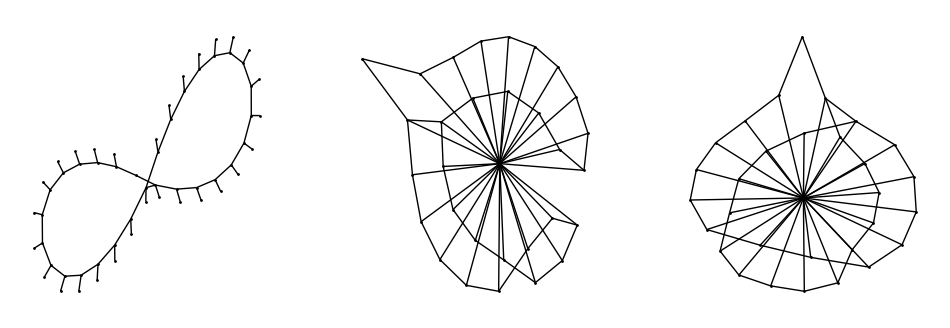

In [668]:
lmax = 3
PLOT = True
id = 0

rscs = [sc]

f2, ax2 = plt.subplots(1,2, figsize = (10,4))
ax2[0].set_xlim([10**-2,10**2])
ax2[1].set_xlim([10**-3,10**1])

if PLOT:
    f, axs = plt.subplots(1,lmax,figsize = (lmax*4,4))
for l in range(lmax):
    sc_r = rscs[l]
    if PLOT:
        plotting.plot_complex(sc_r, ax = axs[l], node_size = 1)
    if sc_r["n1"] > 1:
        B1, B2, __, __, __, __, __ = scomplex.boundary_matrices_3(sc_r)
        assert(np.max(np.abs(np.sum(B1,0))) == 0)
        
        L1 = (B1.T@B1 + B2@B2.T).todense()
        L1_ =  L1 #L1 - np.diag(np.diag(L1)) + np.diag(np.array(np.sum(np.abs(L1 - np.diag(np.diag(L1))),0))[0])
        D0,D1,__,tau_space, fpeaks,fpeaks1,__ = renormalize.plot_heats(1,sc_r, -2,3,plot = False, L1_ = L1_)
        
        pwl.plot_cdf(D1[D1>0],ax = ax2[0])
        pwl.plot_cdf(D0[D0>0],ax = ax2[1])

        D1,U1 = np.linalg.eigh(L1)
        
        tau = tau_space[fpeaks1[id]]
        #tau = 2/np.max(D1)

        #rho1 = (scipy.linalg.expm(-tau*L1_))
        rho1 = U1@np.diag(np.exp(-tau*D1))
        distmatrix = np.zeros_like(rho1)
        for i in range(sc_r["n1"]):
            for j in range(i+1,sc_r["n1"]):
                #distmatrix[i,j] = np.abs(1/rho1[i,j])
                distmatrix[i,j] = np.linalg.norm(rho1[i,:]-rho1[j,:])

        distmatrix = (distmatrix + distmatrix.T)
        condensed_dist = squareform(distmatrix)

        Z = linkage(condensed_dist, method = "average")

        psi, thresholds = renormalize.compute_psi(Z,6)
        maxpsi = scipy.signal.find_peaks(psi, 0.3*np.max(psi))[0]

        #if len(maxpsi) == 0:
        #    thr = thresholds[np.argmax(psi)]
        #else:
            #thr = thresholds[np.argmax(psi)] # +1 for consistency
        #    thr = thresholds[maxpsi[0]]
        thr = thresholds[np.argmax(psi)]
        
        clusters = scipy.cluster.hierarchy.fcluster(Z,thr,criterion='distance') - 1

        mapnodes,__ = renormalize.coarse_grain(sc_r,1,clusters,np.max(clusters)+1)
        new_sc = renormalize.induce_simplices(sc_r, mapnodes)
    else:
        new_sc = sc_r
    rscs.append(new_sc)

/Users/marconurisso/Desktop/Work/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:305: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


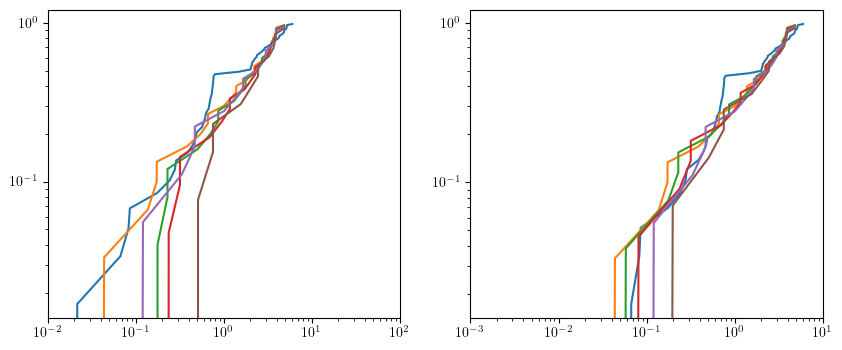

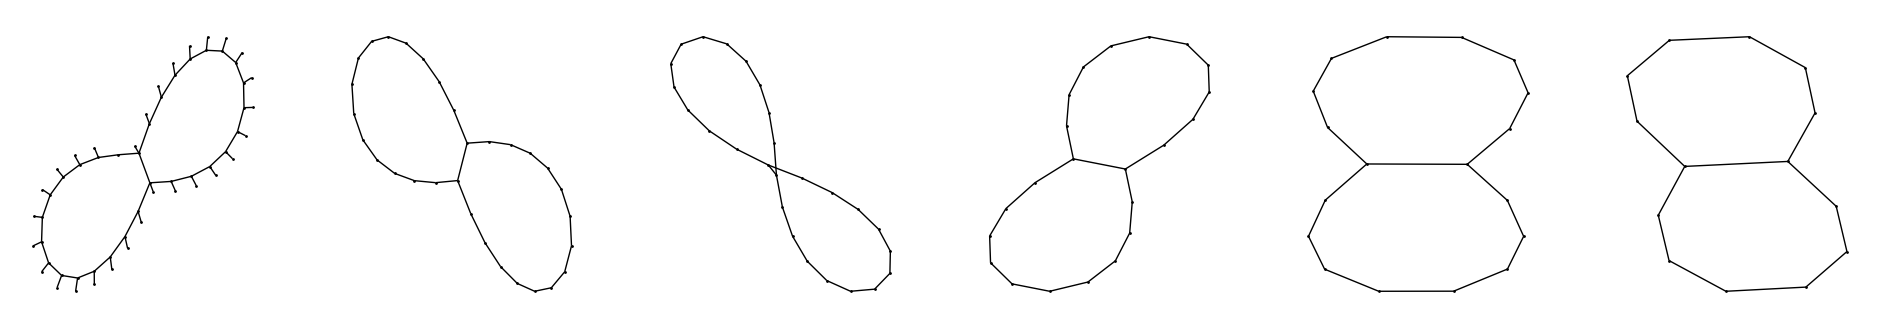

In [667]:
lmax = 6
PLOT = True
id = 0

rscs = [sc]

f2, ax2 = plt.subplots(1,2, figsize = (10,4))
ax2[0].set_xlim([10**-2,10**2])
ax2[1].set_xlim([10**-3,10**1])

if PLOT:
    f, axs = plt.subplots(1,lmax,figsize = (lmax*4,4))
for l in range(lmax):
    sc_r = rscs[l]
    if PLOT:
        plotting.plot_complex(sc_r, ax = axs[l], node_size = 1)
    if sc_r["n1"] > 1:
        B1, B2, __, __, __, __, __ = scomplex.boundary_matrices_3(sc_r)
        assert(np.max(np.abs(np.sum(B1,0))) == 0)
        
        L0 = (B1@B1.T).todense()
        D0,D1,__,tau_space, fpeaks,fpeaks1,__ = renormalize.plot_heats(1,sc_r, -2,3,plot = False)
        
        pwl.plot_cdf(D1[D1>0],ax = ax2[0])
        pwl.plot_cdf(D0[D0>0],ax = ax2[1])
        
        
        tau = tau_space[fpeaks[id]]
        #tau = 2/np.max(D0)

        #rho0 = (scipy.linalg.expm(-tau*L0))
        D0, U0 = np.linalg.eigh(L0)
        rho0 = U0@np.diag(np.exp(-tau*D0))
        distmatrix = np.zeros_like(rho0)
        for i in range(sc_r["n0"]):
            for j in range(i+1,sc_r["n0"]):
                #distmatrix[i,j] = np.abs(1/rho1[i,j])
                distmatrix[i,j] = np.linalg.norm(rho0[i,:]-rho0[j,:])

        distmatrix = (distmatrix + distmatrix.T)
        condensed_dist = squareform(distmatrix)

        Z = linkage(condensed_dist, method = "single")

        psi, thresholds = renormalize.compute_psi(Z,6)
        maxpsi = scipy.signal.find_peaks(psi, 0.3*np.max(psi))[0]

        #if len(maxpsi) == 0:
        #    thr = thresholds[np.argmax(psi)]
        #else:
            #thr = thresholds[np.argmax(psi)] # +1 for consistency
        #    thr = thresholds[maxpsi[0]]
        thr = thresholds[np.argmax(psi)]
        
        clusters = scipy.cluster.hierarchy.fcluster(Z,thr,criterion='distance') - 1

        mapnodes,__ = renormalize.coarse_grain(sc_r,0,clusters,np.max(clusters)+1)
        new_sc = renormalize.induce_simplices(sc_r, mapnodes)
    else:
        new_sc = sc_r
    rscs.append(new_sc)

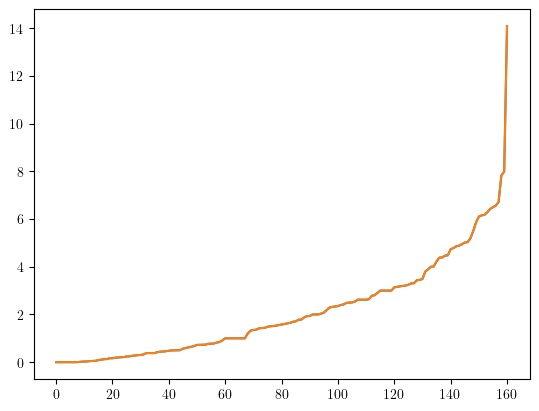

In [273]:
plt.plot(D1)
plt.plot(D1r)

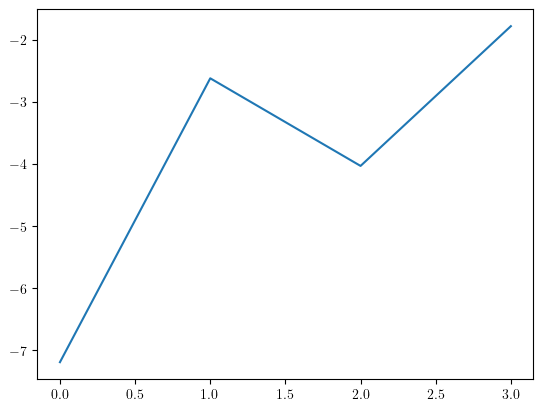

In [130]:
mcurv = np.zeros(lmax)
for l in range(lmax):
    sc_r = rscs[l]
    B1, B2, __, __, __, __, __ = scomplex.boundary_matrices_3(sc_r)
    L1 = (B1.T@B1 + B2@B2.T).todense()
    L1B = L1 - np.diag(np.diag(L1)) + np.diag(np.array(np.sum(np.abs(L1 - np.diag(np.diag(L1))),0))[0])
    F = L1 - L1B
    mcurv[l] = np.mean(np.diag(F))

plt.plot(mcurv)

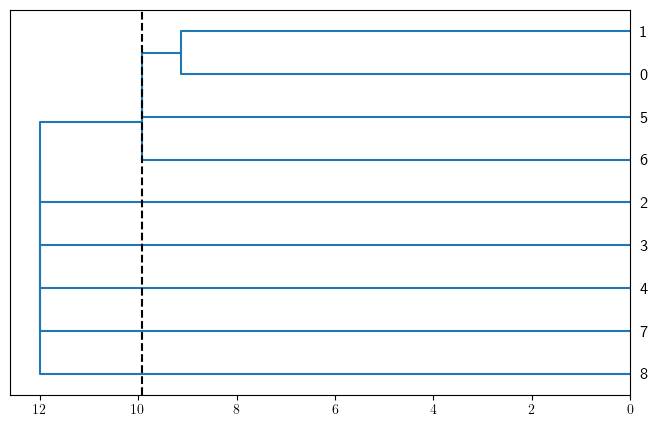

In [351]:
sc_r = rscs[1]
B1, B2, __, __, __, __, __ = scomplex.boundary_matrices_3(sc_r)
L1 = (B1.T@B1 + B2@B2.T).todense()
D0,D1,__,tau_space, fpeaks,fpeaks1,__ = renormalize.plot_heats(1,sc_r, -2,3,plot = False)
tau = tau_space[fpeaks1[0]]
tau = 1/np.max(D1)


rho1 = (scipy.linalg.expm(-tau*L1))
distmatrix = np.zeros_like(rho1)
for i in range(sc_r["n1"]):
    for j in range(i+1,sc_r["n1"]):
        if rho1[i,j] == 0:
            distmatrix[i,j] = 100
        else:
            distmatrix[i,j] = np.abs(1/rho1[i,j])

distmatrix = (distmatrix + distmatrix.T)

condensed_dist = squareform(distmatrix)
Z = linkage(condensed_dist, method = "single")

psi, thresholds = renormalize.compute_psi(Z,4)
thr = thresholds[np.argmax(psi)] # +1 for consistency
#thr = thresholds[np.argwhere(psi > 0.1)[0]]

f,ax = plt.subplots(figsize = (8,5))
den = dendrogram(Z, orientation="left", ax = ax);
ax.vlines(x = thr, ymin = ax.get_ylim()[0], ymax = ax.get_ylim()[1], linestyle = "dashed", color = "black")


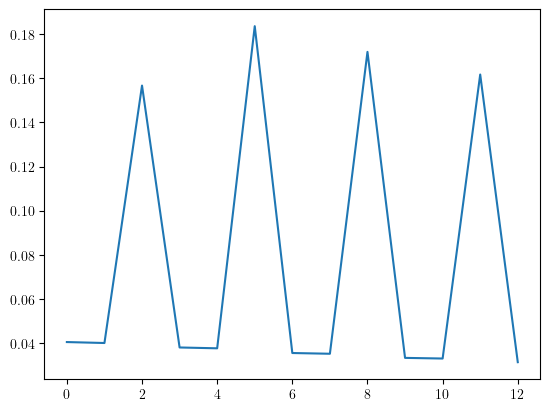

In [349]:
psi, thresholds = renormalize.compute_psi(Z,1)
plt.plot(psi)

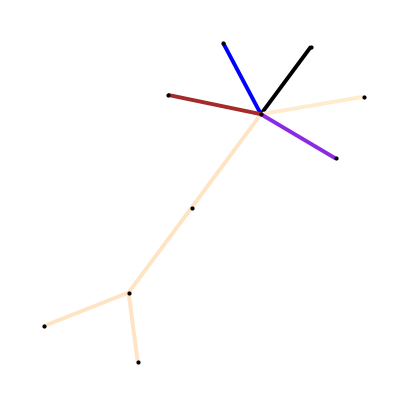

In [352]:
clusters = scipy.cluster.hierarchy.fcluster(Z,thr,criterion='distance')
colz = "black"

f, ax = plt.subplots(1,1,figsize = (5,5))
colors_edges = [(colors + colors)[i+5] for i in clusters]
G = nx.Graph()
G.add_nodes_from([i for i in range(sc_r["n0"])])
for i in range(sc_r["n1"]):
    G.add_edge(sc_r["edges"][i,0],sc_r["edges"][i,1])

pos = nx.spring_layout(G,iterations = 1000)
nx.draw(G,edge_color=colors_edges,pos = pos, node_size = 4,width = 2.8,node_color = colz, ax = ax)





In [470]:
D1,U1 = np.linalg.eigh(L1)
D0,U0 = np.linalg.eigh(L0)

In [471]:
X0 = np.abs(np.asarray(U1@np.diag(np.exp(-1*D1))))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning

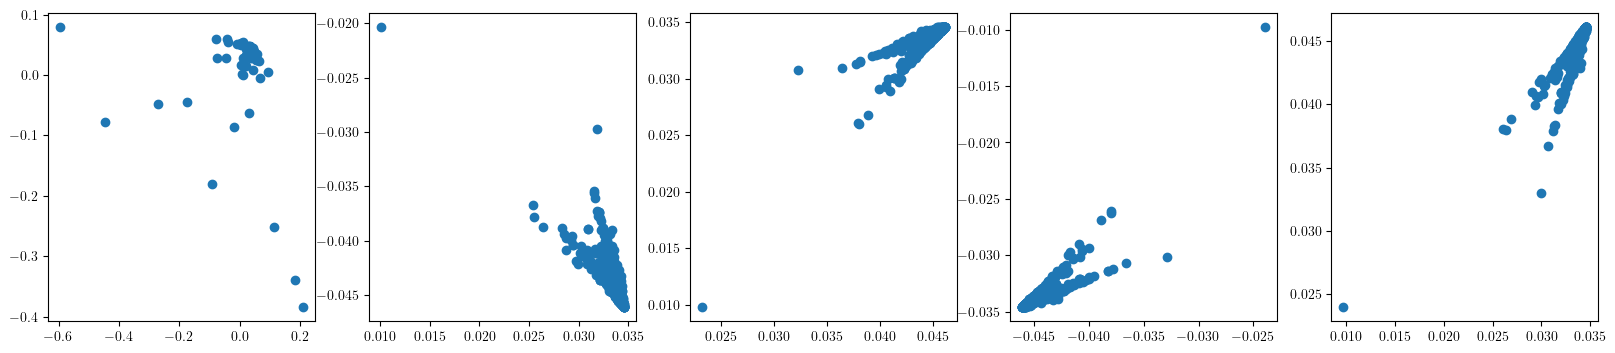

In [472]:
ica = sklearn.decomposition.FastICA(n_components=2)

tau_space = np.linspace(0,50,5)
f,axs = plt.subplots(1,len(tau_space), figsize = (4*len(tau_space),4))
Xtraject0 = np.zeros((sc["n1"],len(tau_space)))
Xtraject1 = np.zeros((sc["n1"],len(tau_space)))

for i in range(len(tau_space)):
    X = np.abs(np.asarray(U1@np.diag(np.exp(-tau_space[i]*D1))@U1.T))
    S_ica = ica.fit(X0).transform(X) 
    Xtraject0 = S_ica[:,0]
    Xtraject1 = S_ica[:,1]
    axs[i].scatter(Xtraject0,Xtraject1);

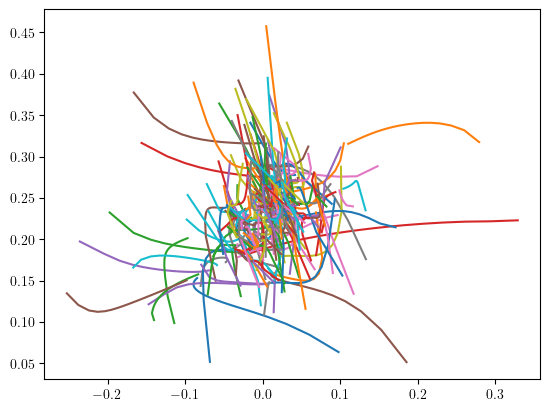

In [334]:
ica = sklearn.decomposition.PCA(n_components=2)

tau_space = np.linspace(0,100,30)
Xtraject0 = np.zeros((sc["n1"],len(tau_space)))
Xtraject1 = np.zeros((sc["n1"],len(tau_space)))

for i in range(len(tau_space)):
    X = (np.asarray(U1@np.diag(np.exp(-tau_space[i]*D1))))
    S_ica = ica.fit(X0).transform(X) 
    Xtraject0[:,i] = S_ica[:,0]
    Xtraject1[:,i] = S_ica[:,1]

plt.plot(Xtraject0.T,Xtraject1.T);

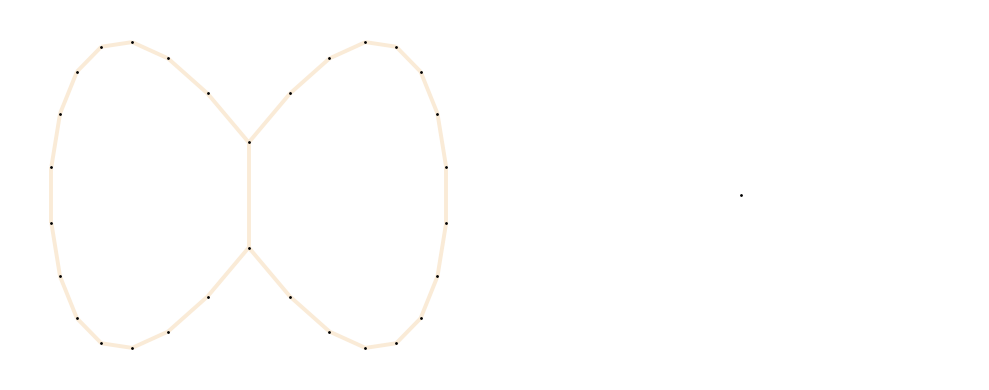

In [385]:
tau = 10
X = np.abs(np.asarray(U1@np.diag(np.exp(-tau*D1))))
dbs = sklearn.cluster.DBSCAN(eps = 10).fit(X)
fig,axs = plt.subplots(1,2,figsize = (10,4))


clusters = dbs.labels_+1

colz = "black"

colors_edges = [(colors + colors)[i] for i in clusters]

nx.draw(G,edge_color=colors_edges,pos = pos, node_size = ns,width = 2.8,node_color = colz, ax = axs[0])

mapnodes,__ = renormalize.coarse_grain(sc,1,clusters,np.max(clusters)+1)
new_sc = renormalize.induce_simplices(sc, mapnodes)

Gnew = nx.Graph()
Gnew.add_nodes_from([i for i in range(new_sc["n0"])])
for i in range(new_sc["n1"]):
    Gnew.add_edge(new_sc["edges"][i,0],new_sc["edges"][i,1])
#posnew = nx.spring_layout(Gnew,iterations =2000)
posnew = nx.spectral_layout(Gnew)


nx.draw(Gnew, node_size = ns, node_color = colz, edge_color = colz, width = 1, pos = posnew, ax = axs[1])
fig.tight_layout()
#plt.savefig('clusters_renorm.png', transparent=True)




In [5]:
D1,U1 = np.linalg.eigh(L1B)
D0,U0 = np.linalg.eigh(L0)

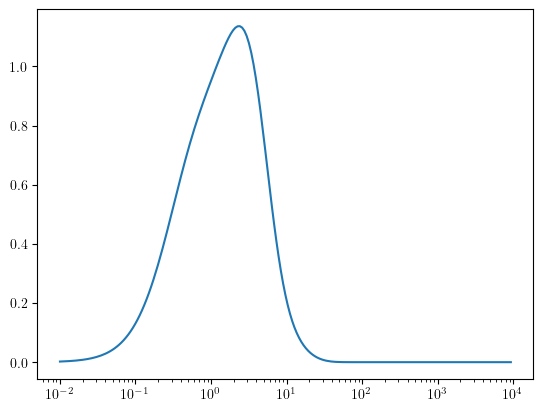

In [315]:

specific_heat1B,tau_space, S1B = renormalize.compute_heat(D1,-2,4,200)
plt.semilogx(tau_space,specific_heat1B)

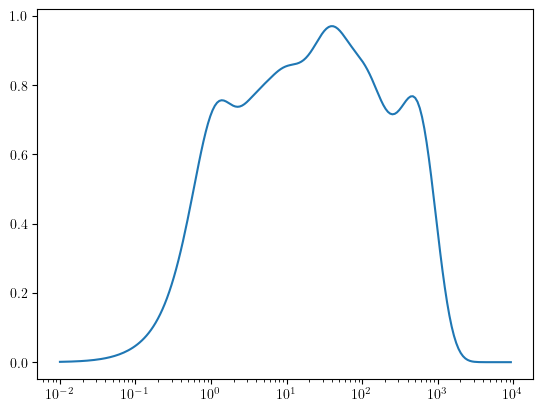

In [98]:
B1, B2, __, __, edge_dict, face_dict, tet_dict = scomplex.boundary_matrices_3(sc)


L1d = (B1.T@B1).todense()
L1dR = -np.abs(L1d - np.diag(np.diag(L1d))) + np.diag(np.array(np.sum(np.abs(L1d - np.diag(np.diag(L1d))),0))[0])

L1u = (B2@B2.T).todense()
L1uR = -np.abs(L1u - np.diag(np.diag(L1u))) + np.diag(np.array(np.sum(np.abs(L1u - np.diag(np.diag(L1u))),0))[0])

L1tot = (B2@B2.T + B1.T@B1).todense()
L1totR = -np.abs(L1tot - np.diag(np.diag(L1tot))) + np.diag(np.array(np.sum(np.abs(L1tot - np.diag(np.diag(L1tot))),0))[0])

L1new = L1uR

D1,U1 = np.linalg.eigh(L1new)
specific_heat1B,tau_space, S1B = renormalize.compute_heat(D1,-2,4,200)
plt.semilogx(tau_space,specific_heat1B)

187


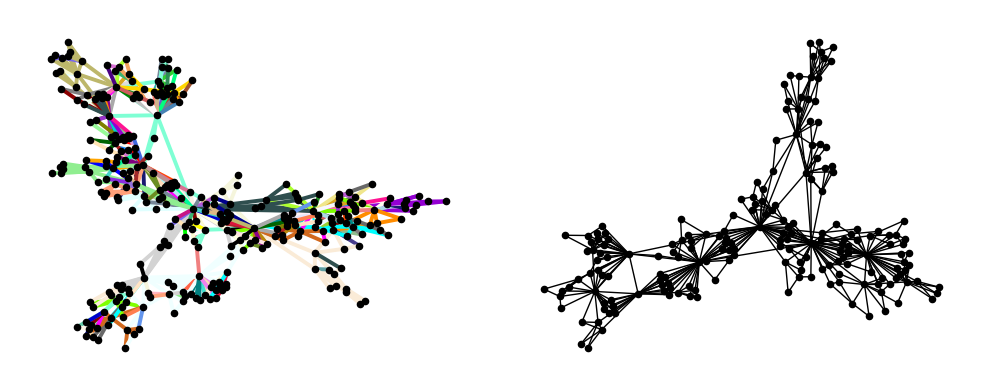

In [93]:
tau = 2
rho  = np.abs(U1@np.diag(np.exp(-tau*D1))@U1.T)
Gv = nx.Graph()
Gv.add_nodes_from([i for i in range(sc["n1"])])
for i in range(sc["n1"]):
    for j in range(i+1,sc["n1"]):
        if rho[i,j] >= min(rho[i,i],rho[j,j]):
            Gv.add_edge(i,j)


idx_components = {u:i for i,node_set in enumerate(nx.connected_components(Gv)) for u in node_set}
clusters = [idx_components[u] for u in Gv.nodes]

fig,axs = plt.subplots(1,2,figsize = (10,4))
#fig,axs = plt.subplots(1,1,figsize = (5,5))


colors_edges = [(colors + colors + colors)[i] for i in clusters]

nx.draw(G,edge_color=colors_edges,pos = pos, node_size = 20,width = 2.8,node_color = "black", ax = axs[0])

mapnodes,__ = renormalize.coarse_grain_interfaces(sc,1,clusters,np.max(clusters)+1)
new_sc = renormalize.induce_simplices(sc, mapnodes)

print(new_sc["n0"])

Gnew = nx.Graph()
Gnew.add_nodes_from([i for i in range(new_sc["n0"])])
for i in range(new_sc["n1"]):
    Gnew.add_edge(new_sc["edges"][i,0],new_sc["edges"][i,1])
posnew = nx.spring_layout(Gnew,iterations =500)
#posnew = nx.spectral_layout(Gnew)


nx.draw(Gnew, node_size = 20, node_color = "black", edge_color = "black", width = 1, pos = posnew, ax = axs[1])
fig.tight_layout()
#plt.savefig('clusters_renorm.png', transparent=True)




<AxesSubplot: >

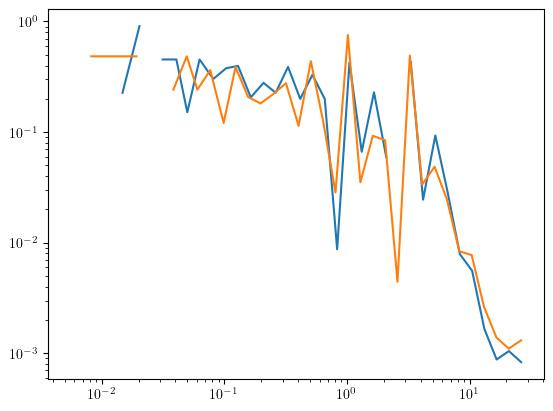

In [99]:
B1n, B2n, __, __, edge_dict, face_dict, tet_dict = scomplex.boundary_matrices_3(new_sc)


r_L1d = (B1n.T@B1n).todense()
r_L1dR = -np.abs(r_L1d - np.diag(np.diag(r_L1d))) + np.diag(np.array(np.sum(np.abs(r_L1d - np.diag(np.diag(r_L1d))),0))[0])

r_L1u = (B2n@B2n.T).todense()
r_L1uR = -np.abs(r_L1u - np.diag(np.diag(r_L1u))) + np.diag(np.array(np.sum(np.abs(r_L1u - np.diag(np.diag(r_L1u))),0))[0])

r_L1tot = (B2n@B2n.T + B1n.T@B1n).todense()
r_L1totR = -np.abs(r_L1tot - np.diag(np.diag(r_L1tot))) + np.diag(np.array(np.sum(np.abs(r_L1tot - np.diag(np.diag(r_L1tot))),0))[0])

L1renorm = r_L1uR
D1renorm,__ = np.linalg.eigh(L1renorm)



pwl.plot_pdf(D1[D1>10**-8])
pwl.plot_pdf(D1renorm[D1renorm>10**-8])


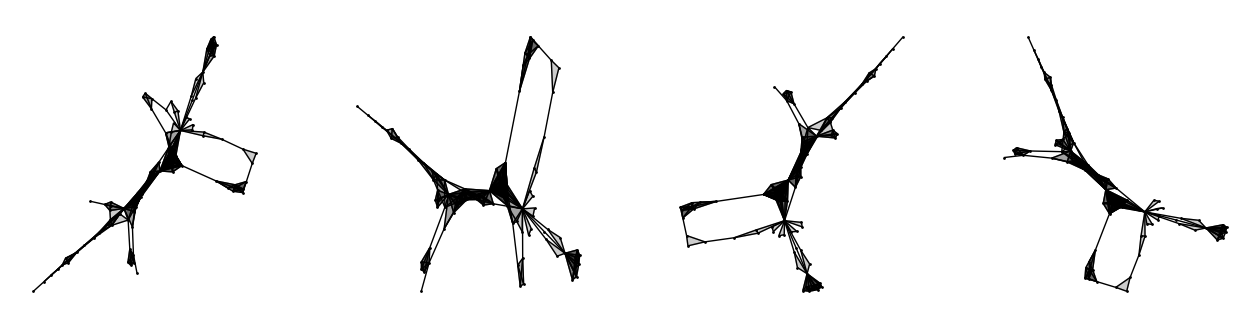

In [343]:
lmax = 4
tau = 1.3
fig,axs = plt.subplots(1,lmax,figsize = (16,4))

new_sc = sc
for l in range(lmax):

    if new_sc["n0"] > 1:
        B1n, B2n, __, __, edge_dict, face_dict, tet_dict = scomplex.boundary_matrices_3(new_sc)
        L1new = (B1n.T@B1n + B2n@B2n.T).todense()
        L1new = -np.abs(L1new - np.diag(np.diag(L1new))) + np.diag(np.array(np.sum(np.abs(L1new - np.diag(np.diag(L1new))),0))[0])
        D1new,U1new = np.linalg.eigh(L1new)

        rho  = np.abs(U1new@np.diag(np.exp(-tau*D1new))@U1new.T)
        Gv = nx.Graph()
        Gv.add_nodes_from([i for i in range(new_sc["n1"])])
        for i in range(new_sc["n1"]):
            for j in range(i+1,new_sc["n1"]):
                if rho[i,j] >= min(rho[i,i],rho[j,j]):
                    Gv.add_edge(i,j)

            
        idx_components = {u:i for i,node_set in enumerate(nx.connected_components(Gv)) for u in node_set}
        clusters = [idx_components[u] for u in Gv.nodes]

        mapnodes,__ = renormalize.coarse_grain(new_sc,1,clusters,np.max(clusters)+1)
        new_sc = renormalize.induce_simplices(new_sc, mapnodes)

    plotting.plot_complex(new_sc,axs[l],layout = "spring",node_size = 1)



/Users/marconurisso/Desktop/Work/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:305: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


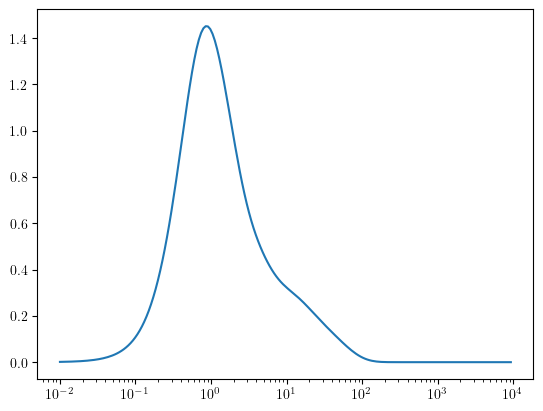

In [341]:
B1n, B2n, __, __, edge_dict, face_dict, tet_dict = scomplex.boundary_matrices_3(sc)
L1new = (B1n.T@B1n + B2n@B2n.T).todense()
D1new,U1new = np.linalg.eigh(L1new)
specific_heat1B,tau_space, S1B = renormalize.compute_heat(D1new,-2,4,200)
plt.semilogx(tau_space,specific_heat1B)

ValueError: 'c' argument has 33 elements, which is inconsistent with 'x' and 'y' with size 32.

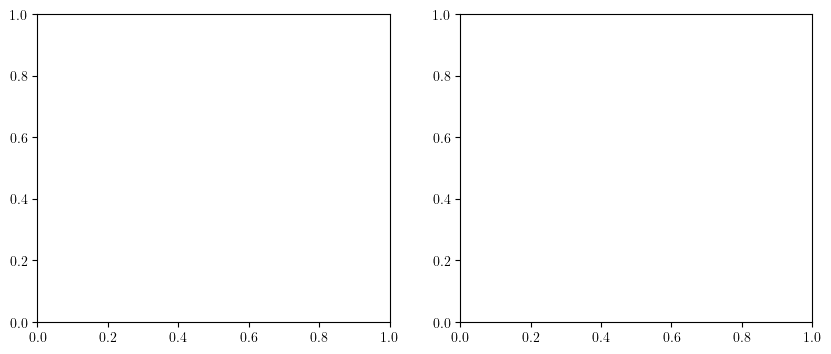

In [386]:
tau = 15
rho  = np.abs(U0@np.diag(np.exp(-tau*D0))@U0.T)
Gv = nx.Graph()
Gv.add_nodes_from([i for i in range(sc["n0"])])
for i in range(sc["n1"]):
    for j in range(i+1,sc["n1"]):
        if rho[i,j] >= min(rho[i,i],rho[j,j]):
            Gv.add_edge(i,j)


idx_components = {u:i for i,node_set in enumerate(nx.connected_components(Gv)) for u in node_set}
clusters = [idx_components[u] for u in Gv.nodes]

fig,axs = plt.subplots(1,2,figsize = (10,4))
#fig,axs = plt.subplots(1,1,figsize = (5,5))


colors_nodes = [(colors + colors)[i] for i in clusters]

nx.draw(G,edge_color="black",pos = pos, node_size = 20,width = 2.8,node_color = colors_nodes, ax = axs[0])

mapnodes,__ = renormalize.coarse_grain(sc,0,clusters,np.max(clusters)+1)
new_sc = renormalize.induce_simplices(sc, mapnodes)

Gnew = nx.Graph()
Gnew.add_nodes_from([i for i in range(new_sc["n0"])])
for i in range(new_sc["n1"]):
    Gnew.add_edge(new_sc["edges"][i,0],new_sc["edges"][i,1])
posnew = nx.spring_layout(Gnew,iterations =500)
#posnew = nx.spectral_layout(Gnew)


nx.draw(Gnew, node_size = 20, node_color = "black", edge_color = "black", width = 1, pos = posnew, ax = axs[1])
fig.tight_layout()
#plt.savefig('clusters_renorm.png', transparent=True)


